In [1]:
import pandas as pd
import missingno as mn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.shape

(418, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We have missing values in Age, cabin features

<Axes: >

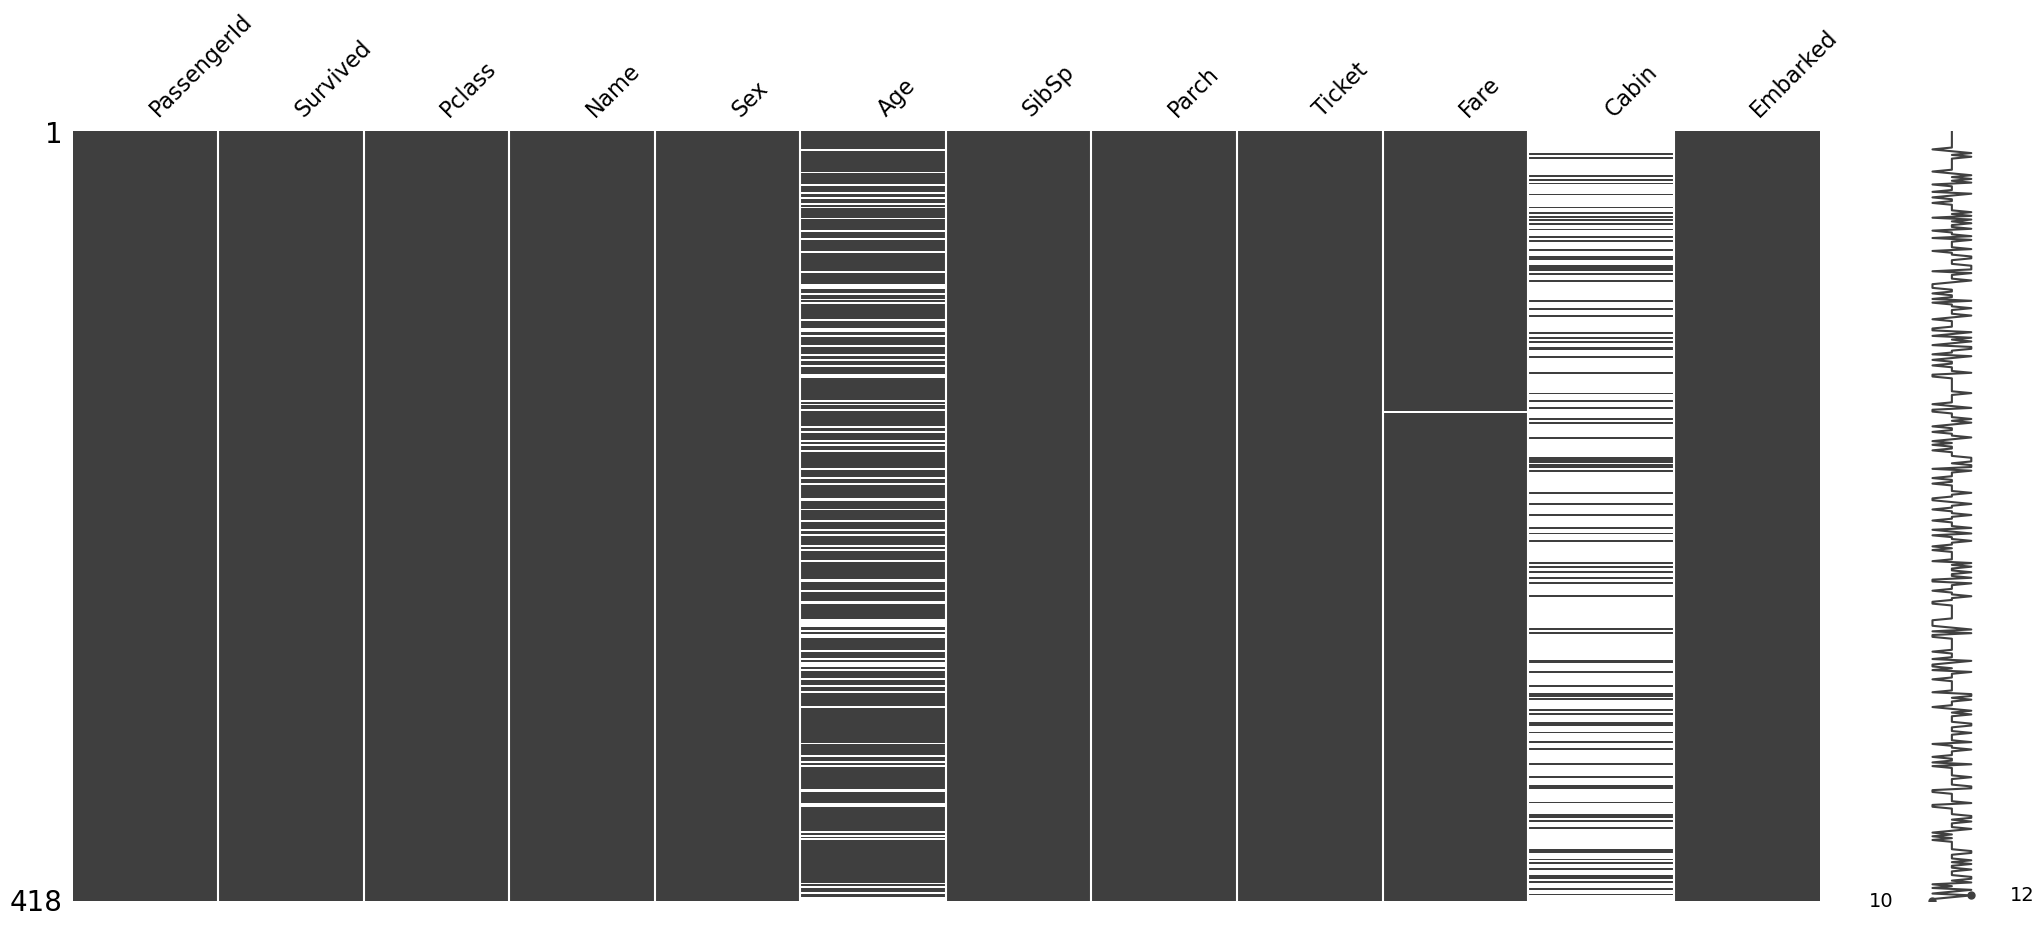

In [4]:
mn.matrix(df)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [18]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

Categorical Variables:

Survived: Represents whether a passenger survived or not (0 = No, 1 = Yes).

Pclass: Represents the ticket class of the passengers (1st, 2nd, or 3rd class).

Sex: Represents the gender of the passengers (male or female).

Embarked: Represents the port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

~Ticket, cabin
(There are 363 unique ticket numbers in the dataset, indicating that some passengers may share a ticket number,,, There are 76 unique cabin numbers in the dataset, indicating that some passengers may share a cabin.)

Numeric Variables:

PassengerId: Identifier for each passenger (numeric).

Age: Represents the age of the passengers (numeric).

SibSp: Represents the number of siblings/spouses aboard the Titanic for each passenger (numeric).

Parch: Represents the number of parents/children aboard the Titanic for each passenger (numeric).

Fare: Represents the fare paid by each passenger (numeric).

In [20]:
unique_values = df.apply(lambda x: x.unique())
print(unique_values)

PassengerId    [892, 893, 894, 895, 896, 897, 898, 899, 900, ...
Survived                                                  [0, 1]
Pclass                                                 [3, 2, 1]
Name           [Kelly, Mr. James, Wilkes, Mrs. James (Ellen N...
Sex                                               [male, female]
Age            [34.5, 47.0, 62.0, 27.0, 22.0, 14.0, 30.0, 26....
SibSp                                      [0, 1, 2, 3, 4, 5, 8]
Parch                                   [0, 1, 3, 2, 4, 6, 5, 9]
Ticket         [330911, 363272, 240276, 315154, 3101298, 7538...
Fare           [7.8292, 7.0, 9.6875, 8.6625, 12.2875, 9.225, ...
Cabin          [nan, B45, E31, B57 B59 B63 B66, B36, A21, C78...
Embarked                                               [Q, S, C]
dtype: object


The apply() function applies the lambda function to each column of the DataFrame, one at a time.
For each column x, the lambda function lambda x: x.unique() is executed, returning an array of unique values for that column.

In [23]:
#defining numerical and categorical values
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
num_feature

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [24]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
cat_feature

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Duplicates

In [3]:
df.duplicated().sum()

0

In [30]:
duplicates = df['Ticket'].duplicated()
duplicates.sum()

55

In [31]:
duplicates1 = df[df['Ticket'].duplicated()]
duplicates1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,951,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C
64,956,0,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
75,967,0,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C
114,1006,1,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S


Same ticket number is referring to a package booking, almost we have 55 duplicates in the ticket column and we can drop the specific column


In [39]:
df.drop(columns = ['Ticket'],inplace=True)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


# Missing Values

In [34]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

cabin feature has almost 78% of missing values, imputing this feature might lead to bias, so dropping this column is useful

In [40]:
df.drop(columns=['Cabin'],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


<Axes: >

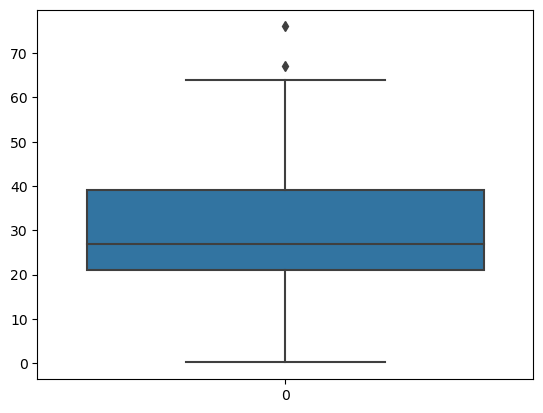

In [9]:
#Age

sns.boxplot(df['Age'])

There are missing values and outliers in Age column

In [41]:
#Mean imputaion

df['mean_imputed_age'] = df['Age'].fillna(df['Age'].mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,mean_imputed_age
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,34.5
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,47.0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,62.0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,27.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,22.0


In [42]:
#Median and Mode Imputations
df['median_imputed_age'] = df['Age'].fillna(df['Age'].median())
df['mode_imputed_age'] = df['Age'].fillna(df['Age'].mode()[0])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,mean_imputed_age,median_imputed_age,mode_imputed_age
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,34.5,34.5,34.5
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,47.0,47.0,47.0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,62.0,62.0,62.0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,27.0,27.0,27.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,22.0,22.0,22.0


In [43]:
# Create age groups
bins = [0, 12, 18, 30, 50, 100]  # Define age group boundaries
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']  # Define age group labels
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
# Set the categories for the Age_Group column
df['Age_Group'] = df['Age_Group'].cat.set_categories(labels + ['Unknown'])
# Treat missing values as a separate category
df['Age_Group'].fillna('Unknown', inplace=True)

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,mean_imputed_age,median_imputed_age,mode_imputed_age,Age_Group
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,34.5,34.5,34.5,Adult
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,47.0,47.0,47.0,Adult
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,62.0,62.0,62.0,Senior
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,27.0,27.0,27.0,Young Adult
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,22.0,22.0,22.0,Young Adult


In [61]:
from sklearn.impute import KNNImputer



# Identify missing values
missing_age_indices = df['Age'].isnull()

# Select features and scale numerical features if necessary

# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=5, metric='nan_euclidean')  # Use 'nan_euclidean' as the metric

# Fit the imputer on the dataset and transform it to impute missing age values
df_imputed = df.copy()  # Make a copy of the original DataFrame
df_imputed['Age'] = imputer.fit_transform(df_imputed[['Age']])[:, 0]

df_imputed.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,mean_imputed_age,median_imputed_age,mode_imputed_age,Age_Group
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,34.5,34.5,34.5,Adult
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,47.0,47.0,47.0,Adult
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,62.0,62.0,62.0,Senior
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,27.0,27.0,27.0,Young Adult
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,22.0,22.0,22.0,Young Adult


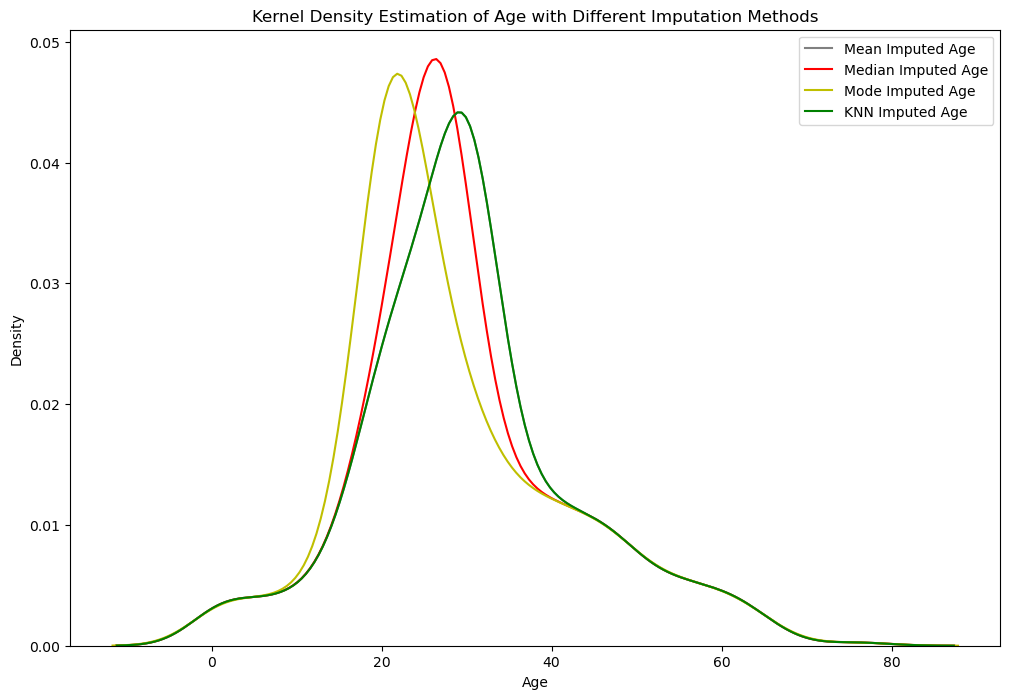

In [63]:
plt.figure(figsize=(12, 8))
#sns.kdeplot(df['Age'], color='b', label='Original Age')
sns.kdeplot(df['mean_imputed_age'], color='grey', label='Mean Imputed Age')
sns.kdeplot(df['median_imputed_age'], color='r', label='Median Imputed Age')
sns.kdeplot(df['mode_imputed_age'], color='y', label='Mode Imputed Age')
sns.kdeplot(df_imputed['Age'],color='g',label='KNN Imputed Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Age with Different Imputation Methods')
plt.legend()

KNNimputed and mean_imputed show similar behavior



In [64]:
columns_to_drop = ['median_imputed_age','mode_imputed_age','Age']
df.drop(columns=columns_to_drop,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,mean_imputed_age,Age_Group
0,892,0,3,"Kelly, Mr. James",male,0,0,7.8292,Q,34.5,Adult
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,7.0000,S,47.0,Adult
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,9.6875,Q,62.0,Senior
3,895,0,3,"Wirz, Mr. Albert",male,0,0,8.6625,S,27.0,Young Adult
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,12.2875,S,22.0,Young Adult


In [65]:
df.rename(columns={'mean_imputed_age':'Age'},inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Age,Age_Group
0,892,0,3,"Kelly, Mr. James",male,0,0,7.8292,Q,34.5,Adult
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,7.0000,S,47.0,Adult
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,9.6875,Q,62.0,Senior
3,895,0,3,"Wirz, Mr. Albert",male,0,0,8.6625,S,27.0,Young Adult
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,12.2875,S,22.0,Young Adult


In [66]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Age            0
Age_Group      0
dtype: int64

In [79]:
df.Fare.mode()[0]

7.75

In [73]:
df['Fare']=df['Fare'].fillna(df['Fare'].mode()[0])


In [74]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Age            0
Age_Group      0
dtype: int64